In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load dataset
customers_df = pd.read_csv('olist_customers_dataset.csv')
# print(customers_df.shape)
# customers_df.head()

In [3]:
geolocation_df = pd.read_csv('olist_geolocation_dataset.csv')
order_items_df = pd.read_csv('olist_order_items_dataset.csv')
order_payments_df = pd.read_csv('olist_order_payments_dataset.csv')
order_reviews_df = pd.read_csv('olist_order_reviews_dataset.csv')
orders_df = pd.read_csv('olist_orders_dataset.csv')
products_df = pd.read_csv('olist_products_dataset.csv')
sellers_df = pd.read_csv('olist_sellers_dataset.csv')
product_translation_df = pd.read_csv('product_category_name_translation.csv')

In [4]:
print(customers_df.columns)
print(geolocation_df.columns)
print(order_items_df.columns)
print(order_payments_df.columns)
print(order_reviews_df.columns)
print(orders_df.columns)
print(products_df.columns)
print(sellers_df.columns)
print(product_translation_df.columns)

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')
Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')
Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')
Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')
Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')
Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')
Index(['product_id', 'prod

In [5]:
updated_orders_payments_df=pd.merge(orders_df, order_payments_df, on = 'order_id', how ='left' )

In [6]:
updated_orders_payments_df=pd.merge(orders_df, order_payments_df, on = 'order_id', how ='left' )

In [7]:
updated_orders_payments_df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value'],
      dtype='object')

In [8]:
order_items_df.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

In [9]:
products_df.columns

Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

In [10]:
updated_products_order_items_df=pd.merge(order_items_df, products_df, on='product_id', how='left' )

In [11]:
orders_df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

In [12]:
order_reviews_df.columns

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')

In [13]:
updated_orders_payment_reviews_df = pd.merge(updated_orders_payments_df, order_reviews_df, on='order_id', how='left')

In [14]:
sellers_df.columns

Index(['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state'], dtype='object')

In [15]:
geolocation_df.columns

Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')

In [16]:
# sellers_geolocation_df=pd.merge(sellers_df, geolocation_df, left_on='seller_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='left')

In [17]:
# Take average lat/lng for each zip code prefix
geo_grouped = geolocation_df.groupby('geolocation_zip_code_prefix').agg({
    'geolocation_lat': 'mean',
    'geolocation_lng': 'mean'
}).reset_index()

# Merge with sellers
sellers_geolocation_df = pd.merge(sellers_df, geo_grouped, left_on='seller_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='left')

In [18]:
sellers_geolocation_df.columns

Index(['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng'],
      dtype='object')

In [19]:
updated_products_order_items_df.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

In [20]:
updated_sellers_geolocation_products_order_items_df= pd.merge(sellers_geolocation_df, updated_products_order_items_df, on='seller_id', how='right')

In [21]:
updated_sellers_geolocation_products_order_items_df.columns

Index(['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'order_id', 'order_item_id', 'product_id', 'shipping_limit_date',
       'price', 'freight_value', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm'],
      dtype='object')

In [22]:
updated_orders_payment_reviews_df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')

In [23]:
updated_orders_payment_reviews_df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')

In [24]:
customers_df.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

In [25]:
updated_orders_payment_reviews_customers_df=pd.merge(updated_orders_payment_reviews_df, customers_df, on='customer_id', how='left')

In [26]:
updated_orders_payment_reviews_customers_df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state'],
      dtype='object')

In [27]:
updated_sellers_geolocation_products_order_items_df.columns

Index(['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'order_id', 'order_item_id', 'product_id', 'shipping_limit_date',
       'price', 'freight_value', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm'],
      dtype='object')

In [28]:
updated_orders_payment_reviews_customers_df.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,credit_card,...,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3.0,voucher,...,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP


In [29]:
updated_sellers_geolocation_products_order_items_df.head(2)

,seller_id,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,order_id,order_item_id,product_id,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,48436dade18ac8b2bce089ec2a041202,27277,volta redonda,SP,27277.0,-22.496953,-44.127492,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,...,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,dd7ddc04e1b6c2c614352b383efe2d36,3471,sao paulo,SP,3471.0,-23.565096,-46.518565,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,...,239.9,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0


In [30]:
combined_df=pd.merge(updated_orders_payment_reviews_customers_df, updated_sellers_geolocation_products_order_items_df, on='order_id', how='left')

In [31]:
combined_df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'order_item_id', 'product_id', 'shipping_limit_date', 'price',
       'freight_value', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='obj

In [32]:
combined_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,credit_card,...,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3.0,voucher,...,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2.0,voucher,...,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,boleto,...,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,credit_card,...,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0


In [33]:
combined_df['order_status'].value_counts()

order_status
delivered      115723
shipped          1256
canceled          750
unavailable       652
invoiced          378
processing        376
created             5
approved            3
Name: count, dtype: int64

In [34]:
#Adding target Variable
combined_df['is_returned'] = combined_df['order_status'].apply(lambda x: 1 if x == 'canceled' else 0)

In [35]:
combined_df.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,is_returned
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,credit_card,...,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3.0,voucher,...,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2.0,voucher,...,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,0
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,boleto,...,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,0
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,credit_card,...,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,0


'customer_city', 'customer_state','seller_city', 'seller_state','price',
'product_category_name','product_weight_g','product_length_cm', 'product_height_cm', 'product_width_cm', 'product_photos_qty','freight_value', 'order_approved_at','order_delivered_customer_date', 'order_estimated_delivery_date', 'review_score','payment_value','payment_type', 'payment_installments'

In [36]:
#for reference
# df.drop('column_name', axis=1, inplace=True)
# df.drop(['col1', 'col2'], axis=1, inplace=True)
# df.rename(columns={'old_name': 'new_name'}, inplace=True)
# df.rename(columns={'old1': 'new1', 'old2': 'new2'}, inplace=True)

In [37]:
combined_df=combined_df[['customer_city', 'customer_state','seller_city', 'seller_state','price',
'product_category_name','product_weight_g','product_length_cm', 'product_height_cm', 'product_width_cm', 'product_photos_qty','freight_value', 'order_approved_at','order_delivered_customer_date', 'order_estimated_delivery_date', 'review_score','payment_value','payment_type', 'payment_installments','is_returned']]

In [38]:
combined_df.head(3)

,customer_city,customer_state,seller_city,seller_state,price,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_photos_qty,freight_value,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,review_score,payment_value,payment_type,payment_installments,is_returned
0,sao paulo,SP,maua,SP,29.99,utilidades_domesticas,500.0,19.0,8.0,13.0,4.0,8.72,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18 00:00:00,4.0,18.12,credit_card,1.0,0
1,sao paulo,SP,maua,SP,29.99,utilidades_domesticas,500.0,19.0,8.0,13.0,4.0,8.72,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18 00:00:00,4.0,2.00,voucher,1.0,0
2,sao paulo,SP,maua,SP,29.99,utilidades_domesticas,500.0,19.0,8.0,13.0,4.0,8.72,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18 00:00:00,4.0,18.59,voucher,1.0,0


In [39]:
product_translation_df.columns

Index(['product_category_name', 'product_category_name_english'], dtype='object')

In [40]:
final_df=pd.merge(combined_df,product_translation_df, on='product_category_name', how='left')

In [41]:
final_df.head()

,customer_city,customer_state,seller_city,seller_state,price,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,...,freight_value,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,review_score,payment_value,payment_type,payment_installments,is_returned,product_category_name_english
0,sao paulo,SP,maua,SP,29.99,utilidades_domesticas,500.0,19.0,8.0,13.0,...,8.72,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18 00:00:00,4.0,18.12,credit_card,1.0,0,housewares
1,sao paulo,SP,maua,SP,29.99,utilidades_domesticas,500.0,19.0,8.0,13.0,...,8.72,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18 00:00:00,4.0,2.00,voucher,1.0,0,housewares
2,sao paulo,SP,maua,SP,29.99,utilidades_domesticas,500.0,19.0,8.0,13.0,...,8.72,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18 00:00:00,4.0,18.59,voucher,1.0,0,housewares
3,barreiras,BA,belo horizonte,SP,118.70,perfumaria,400.0,19.0,13.0,19.0,...,22.76,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13 00:00:00,4.0,141.46,boleto,1.0,0,perfumery
4,vianopolis,GO,guariba,SP,159.90,automotivo,420.0,24.0,19.0,21.0,...,19.22,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04 00:00:00,5.0,179.12,credit_card,3.0,0,auto


In [42]:
final_df.rename(columns={'product_category_name_english': 'product_category'}, inplace=True)

In [43]:
final_df.head()

,customer_city,customer_state,seller_city,seller_state,price,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,...,freight_value,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,review_score,payment_value,payment_type,payment_installments,is_returned,product_category
0,sao paulo,SP,maua,SP,29.99,utilidades_domesticas,500.0,19.0,8.0,13.0,...,8.72,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18 00:00:00,4.0,18.12,credit_card,1.0,0,housewares
1,sao paulo,SP,maua,SP,29.99,utilidades_domesticas,500.0,19.0,8.0,13.0,...,8.72,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18 00:00:00,4.0,2.00,voucher,1.0,0,housewares
2,sao paulo,SP,maua,SP,29.99,utilidades_domesticas,500.0,19.0,8.0,13.0,...,8.72,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18 00:00:00,4.0,18.59,voucher,1.0,0,housewares
3,barreiras,BA,belo horizonte,SP,118.70,perfumaria,400.0,19.0,13.0,19.0,...,22.76,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13 00:00:00,4.0,141.46,boleto,1.0,0,perfumery
4,vianopolis,GO,guariba,SP,159.90,automotivo,420.0,24.0,19.0,21.0,...,19.22,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04 00:00:00,5.0,179.12,credit_card,3.0,0,auto


In [44]:
final_df=final_df[['customer_city', 'customer_state','seller_city', 'seller_state','price',
'product_category','product_weight_g','product_length_cm', 'product_height_cm', 'product_width_cm', 'product_photos_qty','freight_value', 'order_approved_at','order_delivered_customer_date', 'order_estimated_delivery_date', 'review_score','payment_value','payment_type', 'payment_installments','is_returned']]

In [45]:
final_df.head()

,customer_city,customer_state,seller_city,seller_state,price,product_category,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_photos_qty,freight_value,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,review_score,payment_value,payment_type,payment_installments,is_returned
0,sao paulo,SP,maua,SP,29.99,housewares,500.0,19.0,8.0,13.0,4.0,8.72,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18 00:00:00,4.0,18.12,credit_card,1.0,0
1,sao paulo,SP,maua,SP,29.99,housewares,500.0,19.0,8.0,13.0,4.0,8.72,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18 00:00:00,4.0,2.00,voucher,1.0,0
2,sao paulo,SP,maua,SP,29.99,housewares,500.0,19.0,8.0,13.0,4.0,8.72,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18 00:00:00,4.0,18.59,voucher,1.0,0
3,barreiras,BA,belo horizonte,SP,118.70,perfumery,400.0,19.0,13.0,19.0,1.0,22.76,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13 00:00:00,4.0,141.46,boleto,1.0,0
4,vianopolis,GO,guariba,SP,159.90,auto,420.0,24.0,19.0,21.0,1.0,19.22,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04 00:00:00,5.0,179.12,credit_card,3.0,0


In [46]:
#Converting Dates to datetime here
final_df['order_approved_at'] = pd.to_datetime(final_df['order_approved_at'])
final_df['order_delivered_customer_date'] = pd.to_datetime(final_df['order_delivered_customer_date'])
final_df['order_estimated_delivery_date'] = pd.to_datetime(final_df['order_estimated_delivery_date'])

In [47]:
final_df.head()

,customer_city,customer_state,seller_city,seller_state,price,product_category,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_photos_qty,freight_value,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,review_score,payment_value,payment_type,payment_installments,is_returned
0,sao paulo,SP,maua,SP,29.99,housewares,500.0,19.0,8.0,13.0,4.0,8.72,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,4.0,18.12,credit_card,1.0,0
1,sao paulo,SP,maua,SP,29.99,housewares,500.0,19.0,8.0,13.0,4.0,8.72,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,4.0,2.00,voucher,1.0,0
2,sao paulo,SP,maua,SP,29.99,housewares,500.0,19.0,8.0,13.0,4.0,8.72,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,4.0,18.59,voucher,1.0,0
3,barreiras,BA,belo horizonte,SP,118.70,perfumery,400.0,19.0,13.0,19.0,1.0,22.76,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13,4.0,141.46,boleto,1.0,0
4,vianopolis,GO,guariba,SP,159.90,auto,420.0,24.0,19.0,21.0,1.0,19.22,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04,5.0,179.12,credit_card,3.0,0


In [48]:
#To understand delivery delay
final_df['delivery_delay'] = (
    final_df['order_delivered_customer_date'] - final_df['order_estimated_delivery_date']).dt.days.fillna(0)

In [49]:
final_df.head()

,customer_city,customer_state,seller_city,seller_state,price,product_category,product_weight_g,product_length_cm,product_height_cm,product_width_cm,...,freight_value,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,review_score,payment_value,payment_type,payment_installments,is_returned,delivery_delay
0,sao paulo,SP,maua,SP,29.99,housewares,500.0,19.0,8.0,13.0,...,8.72,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,4.0,18.12,credit_card,1.0,0,-8.0
1,sao paulo,SP,maua,SP,29.99,housewares,500.0,19.0,8.0,13.0,...,8.72,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,4.0,2.00,voucher,1.0,0,-8.0
2,sao paulo,SP,maua,SP,29.99,housewares,500.0,19.0,8.0,13.0,...,8.72,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,4.0,18.59,voucher,1.0,0,-8.0
3,barreiras,BA,belo horizonte,SP,118.70,perfumery,400.0,19.0,13.0,19.0,...,22.76,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13,4.0,141.46,boleto,1.0,0,-6.0
4,vianopolis,GO,guariba,SP,159.90,auto,420.0,24.0,19.0,21.0,...,19.22,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04,5.0,179.12,credit_card,3.0,0,-18.0


In [50]:
#According to product volume
final_df['product_volume'] = final_df['product_length_cm'] * final_df['product_height_cm'] * final_df['product_width_cm']

In [51]:
final_df.head(5)

,customer_city,customer_state,seller_city,seller_state,price,product_category,product_weight_g,product_length_cm,product_height_cm,product_width_cm,...,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,review_score,payment_value,payment_type,payment_installments,is_returned,delivery_delay,product_volume
0,sao paulo,SP,maua,SP,29.99,housewares,500.0,19.0,8.0,13.0,...,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,4.0,18.12,credit_card,1.0,0,-8.0,1976.0
1,sao paulo,SP,maua,SP,29.99,housewares,500.0,19.0,8.0,13.0,...,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,4.0,2.00,voucher,1.0,0,-8.0,1976.0
2,sao paulo,SP,maua,SP,29.99,housewares,500.0,19.0,8.0,13.0,...,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,4.0,18.59,voucher,1.0,0,-8.0,1976.0
3,barreiras,BA,belo horizonte,SP,118.70,perfumery,400.0,19.0,13.0,19.0,...,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13,4.0,141.46,boleto,1.0,0,-6.0,4693.0
4,vianopolis,GO,guariba,SP,159.90,auto,420.0,24.0,19.0,21.0,...,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04,5.0,179.12,credit_card,3.0,0,-18.0,9576.0


In [52]:
#Dropping the used rows
final_df = final_df.drop(columns=[
    'order_approved_at', 'order_delivered_customer_date', 'order_estimated_delivery_date'
])

In [53]:
final_df.head()

,customer_city,customer_state,seller_city,seller_state,price,product_category,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_photos_qty,freight_value,review_score,payment_value,payment_type,payment_installments,is_returned,delivery_delay,product_volume
0,sao paulo,SP,maua,SP,29.99,housewares,500.0,19.0,8.0,13.0,4.0,8.72,4.0,18.12,credit_card,1.0,0,-8.0,1976.0
1,sao paulo,SP,maua,SP,29.99,housewares,500.0,19.0,8.0,13.0,4.0,8.72,4.0,2.00,voucher,1.0,0,-8.0,1976.0
2,sao paulo,SP,maua,SP,29.99,housewares,500.0,19.0,8.0,13.0,4.0,8.72,4.0,18.59,voucher,1.0,0,-8.0,1976.0
3,barreiras,BA,belo horizonte,SP,118.70,perfumery,400.0,19.0,13.0,19.0,1.0,22.76,4.0,141.46,boleto,1.0,0,-6.0,4693.0
4,vianopolis,GO,guariba,SP,159.90,auto,420.0,24.0,19.0,21.0,1.0,19.22,5.0,179.12,credit_card,3.0,0,-18.0,9576.0


In [54]:
# final_df = pd.get_dummies(final_df, columns=['payment_type'])
final_df = pd.get_dummies(final_df, columns=['payment_type', 'product_category', 'customer_state', 'seller_state'], drop_first=True)

In [55]:
final_df.head()

,customer_city,seller_city,price,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_photos_qty,freight_value,review_score,...,seller_state_PE,seller_state_PI,seller_state_PR,seller_state_RJ,seller_state_RN,seller_state_RO,seller_state_RS,seller_state_SC,seller_state_SE,seller_state_SP
0,sao paulo,maua,29.99,500.0,19.0,8.0,13.0,4.0,8.72,4.0,...,False,False,False,False,False,False,False,False,False,True
1,sao paulo,maua,29.99,500.0,19.0,8.0,13.0,4.0,8.72,4.0,...,False,False,False,False,False,False,False,False,False,True
2,sao paulo,maua,29.99,500.0,19.0,8.0,13.0,4.0,8.72,4.0,...,False,False,False,False,False,False,False,False,False,True
3,barreiras,belo horizonte,118.70,400.0,19.0,13.0,19.0,1.0,22.76,4.0,...,False,False,False,False,False,False,False,False,False,True
4,vianopolis,guariba,159.90,420.0,24.0,19.0,21.0,1.0,19.22,5.0,...,False,False,False,False,False,False,False,False,False,True


In [56]:
final_df.columns

Index(['customer_city', 'seller_city', 'price', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_photos_qty', 'freight_value', 'review_score',
       ...
       'seller_state_PE', 'seller_state_PI', 'seller_state_PR',
       'seller_state_RJ', 'seller_state_RN', 'seller_state_RO',
       'seller_state_RS', 'seller_state_SC', 'seller_state_SE',
       'seller_state_SP'],
      dtype='object', length=137)

In [57]:
final_df = final_df.dropna()

In [58]:
final_df = final_df.reset_index(drop=True)

In [59]:
#Train-Test Split
from sklearn.model_selection import train_test_split

In [60]:
final_df[['is_returned']].head()

,is_returned
0,0
1,0
2,0
3,0
4,0


In [61]:
final_df.columns

Index(['customer_city', 'seller_city', 'price', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_photos_qty', 'freight_value', 'review_score',
       ...
       'seller_state_PE', 'seller_state_PI', 'seller_state_PR',
       'seller_state_RJ', 'seller_state_RN', 'seller_state_RO',
       'seller_state_RS', 'seller_state_SC', 'seller_state_SE',
       'seller_state_SP'],
      dtype='object', length=137)

In [62]:
non_numeric = final_df.select_dtypes(include='object').columns
print(non_numeric)

Index(['customer_city', 'seller_city'], dtype='object')


In [63]:
final_df=final_df.drop(columns=['customer_city', 'seller_city'])

In [64]:
#Quick_look into data
print(final_df.shape)
final_df.info()

(115633, 135)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115633 entries, 0 to 115632
Columns: 135 entries, price to seller_state_SP
dtypes: bool(122), float64(12), int64(1)
memory usage: 24.9 MB


In [65]:
#checking for missing values
final_df.isna().sum().sort_values(ascending=False)

price                                        0
product_category_toys                        0
customer_state_PA                            0
customer_state_MT                            0
customer_state_MS                            0
                                            ..
product_category_diapers_and_hygiene         0
product_category_costruction_tools_tools     0
product_category_costruction_tools_garden    0
product_category_cool_stuff                  0
seller_state_SP                              0
Length: 135, dtype: int64

<Axes: title={'center': 'Return Rate'}, xlabel='is_returned'>

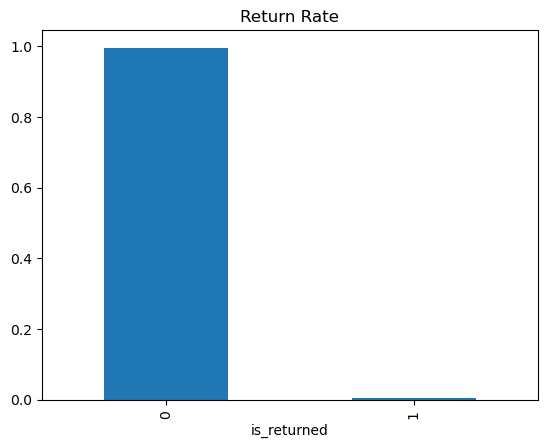

In [66]:
#understanding target variable
final_df['is_returned'].value_counts(normalize=True).plot(kind='bar', title='Return Rate')

As here this column is highly imbalanced, we will use stratified sampling or resampling later

In [67]:
final_df[['price', 'freight_value', 'review_score', 'delivery_delay']].describe()

,price,freight_value,review_score,delivery_delay
count,115633.000000,115633.000000,115633.000000,115633.000000
mean,120.626903,20.056448,4.034220,-11.840539
std,182.621063,15.835315,1.385697,10.132646
min,0.850000,0.000000,1.000000,-147.000000
25%,39.900000,13.080000,4.000000,-17.000000
50%,74.900000,16.320000,5.000000,-12.000000
75%,134.900000,21.210000,5.000000,-7.000000
max,6735.000000,409.680000,5.000000,188.000000


array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'freight_value'}>],
       [<Axes: title={'center': 'delivery_delay'}>, <Axes: >]],
      dtype=object)

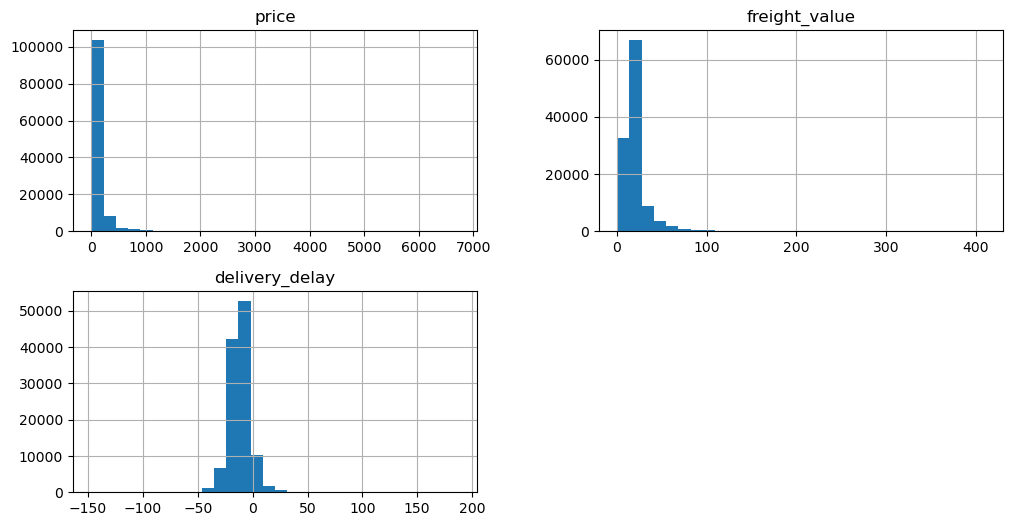

In [68]:
final_df[['price', 'freight_value', 'delivery_delay']].hist(bins=30, figsize=(12, 6))

Price is highly skewed, have to consider using log-transforming or clipping outliers
freight_value is right skewed, most shipping costs are under $100, can consider standardising or normalising
Delivery_delay seems to be normally distributed, but centered around a negative mean, but this looks highly predictive, keep as it is
In review_score, most are 4 or 5, can one-hot encode or bucket into groups

In [69]:
#Applying log transform on price 
#As this is feature enfgineering step we can do before splitting the data
final_df['log_price'] = np.log1p(final_df['price'])  # AS log1p handles 0 safely

In [70]:
# Bucket review_score
final_df['review_bucket'] = final_df['review_score'].apply(
    lambda x: 'low' if x <= 2 else 'medium' if x == 3 else 'high')

In [71]:
final_df[['log_price', 'freight_value', 'delivery_delay', 'review_bucket','review_score' ]].head(5)

,log_price,freight_value,delivery_delay,review_bucket,review_score
0,3.433665,8.72,-8.0,high,4.0
1,3.433665,8.72,-8.0,high,4.0
2,3.433665,8.72,-8.0,high,4.0
3,4.784989,22.76,-6.0,high,4.0
4,5.080783,19.22,-18.0,high,5.0


In [72]:
# final_df = pd.get_dummies(final_df, columns=['review_bucket'])

In [73]:
final_df.head()

,price,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_photos_qty,freight_value,review_score,payment_value,payment_installments,...,seller_state_PR,seller_state_RJ,seller_state_RN,seller_state_RO,seller_state_RS,seller_state_SC,seller_state_SE,seller_state_SP,log_price,review_bucket
0,29.99,500.0,19.0,8.0,13.0,4.0,8.72,4.0,18.12,1.0,...,False,False,False,False,False,False,False,True,3.433665,high
1,29.99,500.0,19.0,8.0,13.0,4.0,8.72,4.0,2.00,1.0,...,False,False,False,False,False,False,False,True,3.433665,high
2,29.99,500.0,19.0,8.0,13.0,4.0,8.72,4.0,18.59,1.0,...,False,False,False,False,False,False,False,True,3.433665,high
3,118.70,400.0,19.0,13.0,19.0,1.0,22.76,4.0,141.46,1.0,...,False,False,False,False,False,False,False,True,4.784989,high
4,159.90,420.0,24.0,19.0,21.0,1.0,19.22,5.0,179.12,3.0,...,False,False,False,False,False,False,False,True,5.080783,high


In [74]:
final_df[['payment_value','price']].head()

,payment_value,price
0,18.12,29.99
1,2.00,29.99
2,18.59,29.99
3,141.46,118.70
4,179.12,159.90


In [75]:
final_df.corr(numeric_only=True)['is_returned'].sort_values(ascending=False)

is_returned                          1.000000
delivery_delay                       0.077235
payment_value                        0.025792
price                                0.023181
customer_state_SP                    0.015929
                                       ...   
product_photos_qty                  -0.007144
product_category_office_furniture   -0.007497
product_category_bed_bath_table     -0.015556
review_score                        -0.120360
payment_type_not_defined                  NaN
Name: is_returned, Length: 136, dtype: float64

In [76]:
final_df['payment_type_not_defined'].value_counts()

payment_type_not_defined
False    115633
Name: count, dtype: int64

In [77]:
# for col in final_df.columns:
#     print(col)

As with .corr(), we got the correlation of numeric values, we are using Cramers V for checking correlation with categorical values

In [78]:
# final_df[['product_category_fashion_shoes'
# ,'product_category_fashion_sport']]. head()

In [79]:
# categorical_columns = final_df.select_dtypes(include=['object', 'category']).columns.tolist()
# print(categorical_columns)

In [80]:
final_df.to_csv("/Users/lakshmiprasannapoluru/Desktop/smart-return-predictor/data/final_df.csv", index=False)

In [81]:
#Finalising the features for base model

features = ['is_returned','delivery_delay','payment_value','price','customer_state_SP',
           'product_category_bed_bath_table','review_score']

In [82]:
#Setting feature and target columns
X = final_df[features].drop(columns=['is_returned'])
y = final_df['is_returned']

X.to_csv("../data/X.csv", index=False)
y.to_csv("../data/y.csv", index=False)

In [83]:
# X.head()

In [84]:
# y.head()

In [85]:
# print(X.isna().sum())
# print(X.dtypes)
# print(y.value_counts())
# print(X.shape)
# print(y.shape)

In [86]:
# #setting the gonna split data with feature and target columns
# X = final_df.drop(columns=['is_returned'])
# y=  final_df['is_returned']

# #Splitting the data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# # used stratify here to maintain even class distribution as there might be less no of returned items

In [87]:
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)